In [44]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
from collections import namedtuple

In [45]:
%run ../modules/utils.ipynb
%run ../modules/cds.ipynb
%run ../modules/preprocessing.ipynb

In [67]:
# df = pd.read_csv('/Users/bryan/Documents/SeqDataSets/Ning1024/12mixtures/19-Table 1.csv')
# df = pd.read_csv('/Users/bryan/Documents/SeqDataSets/Ning1024/12mixtures/30-Table 1.csv')
# df = pd.read_csv('/Users/bryan/Studio/lcmsseq/examples/compounds.csv', skiprows=2)
# df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/Ning1024/5mix_MFE.xlsx')
# df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/Ning1024/2mix_180521s14_100.xls')
# df = pd.read_csv('/Users/bryan/Documents/SeqDataSets/Ning1024/12mixtures/12mix.csv')
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/tRNA_Phe_0724_std.xlsx')
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/oligosdegradsample2-1.xlsx')
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/total_tRNA_acid_degradated_20to40_component_only.xlsx')
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/total_tRNA_acid_deg.xlsx')
# df = thermo_df(df)
# df = df[df.Mass < 20000]
# df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/PaperData/ACS/032919s07.xls')
df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/PaperData/ACS/111418s05.xls')
# df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/PaperData/ACS/100918s06.xls')
df.shape

(5376, 25)

<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

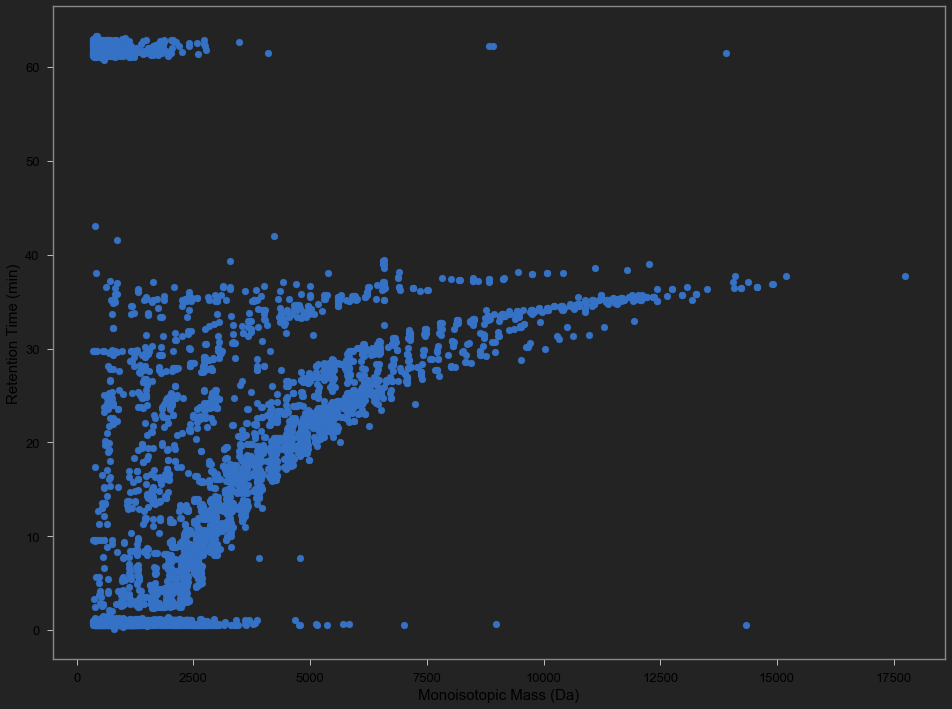

In [68]:
plot_zone(df)

In [69]:

idxs = list()
# create our callback function
def update_point(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)
f = zone_selection(df, update_point)
f

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': '100c5df…

points [3747, 3756, 3830, 3888, 3902, 3930, 3954, 3972, 4044, 4098, 4099, 4101, 4102, 4122, 4123, 4187, 4239, 4240, 4250, 4256, 4257, 4267, 4268, 4276, 4289, 4340, 4342, 4344, 4353, 4355, 4359, 4363, 4365, 4367, 4374, 4386, 4387, 4388, 4400, 4417, 4418, 4424, 4426, 4462, 4470, 4471, 4475, 4478, 4479, 4481, 4483, 4485, 4491, 4494, 4497, 4498, 4499, 4500, 4503, 4504, 4505, 4506, 4507, 4508, 4509, 4514, 4515, 4517, 4518, 4526, 4529, 4530, 4536, 4537, 4546, 4560, 4561, 4562, 4571, 4574, 4576, 4583, 4584, 4592, 4604, 4613, 4628, 4632, 4635, 4640, 4641, 4642, 4644, 4645, 4649, 4651, 4652, 4658, 4659, 4663, 4676, 4677, 4678, 4679, 4687, 4688, 4692, 4694, 4696, 4709, 4710, 4711, 4714, 4719, 4720, 4724, 4726, 4729, 4733, 4739, 4770, 4778, 4785, 4790, 4795, 4797, 4801, 4803, 4805, 4808, 4809, 4810, 4811, 4816, 4817, 4818, 4823, 4824, 4825, 4839, 4840, 4847, 4862, 4863, 4864, 4865, 4868, 4869, 4873, 4874, 4876, 4877, 4878, 4879, 4880, 4881, 4882, 4883, 4899, 4917, 4928, 4929, 4934, 4935, 4936, 49

In [70]:
df_chosen = df.iloc[idxs]
df_chosen.shape

(453, 25)

mass_x (453,) mass_y (453,)
df3_idxs 87 df5_idxs 78
df3_idxs 79 df5_idxs 80
df3_idxs 144 df5_idxs 146
df3_idxs 89 df5_idxs 87
df3_idxs 15 df5_idxs 18
df3_idxs 24 df5_idxs 24
df3_idxs 31 df5_idxs 34
df3_idxs 44 df5_idxs 49


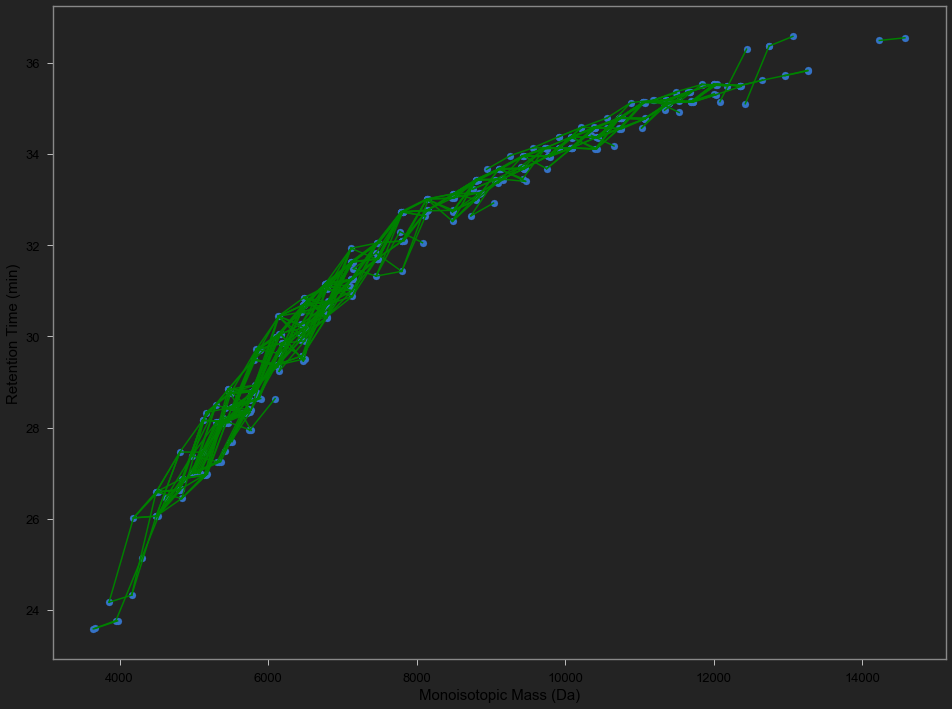

In [71]:
bcr_5p = base_calling_random(df_chosen)
plt, _ = plot_basecalling(*bcr_5p, annotate=False)

In [51]:
def process_slopes(df, mass_pairs, radius=0.25, median=-1):
    slopes = list()
    for t in mass_pairs:
        df_pair = df[df.Mass.isin(t)]
        if df_pair.empty:
            continue
        
        slope = 1E3 * (df_pair.iloc[0].RT - df_pair.iloc[1].RT)/(df_pair.iloc[0].Mass - df_pair.iloc[1].Mass)
        if 0. < slope < float('inf'):
            slopes.append(slope)
    if median < 0:
        median = np.median(slopes)
    lo = median - radius
    lo = lo if lo > 0 else 0
    hi = median + radius
#     median = slope_range(slopes, radius * 2)
#     if not median:
#         return None
#     lo = median.lo
#     hi = median.hi
#     ranges = slope_ranges(slopes)
        
    count = 0
    count_ignore = 0
    accepted_pairs = list()
    for t in mass_pairs:
        df_pair = df[df.Mass.isin(t)]
        if df_pair.empty:
            continue
        
        slope = 1E3 * (df_pair.iloc[0].RT - df_pair.iloc[1].RT)/(df_pair.iloc[0].Mass - df_pair.iloc[1].Mass)
#         if slope > 0.:
        if lo < slope < hi:
#         if any([i[0] < slope < i[1] for i in ranges]):
            slopes.append(slope)
#             plt.plot(df_pair.Mass, df_pair.RT, 'green')
            count += 1
            accepted_pairs.append(df_pair)
        else:
            count_ignore += 1
    
#     print('median {:.2f} lo-hi {:.3f}-{:.3f} accept {} reject {}'.format((lo+hi)/2, lo, hi, count, count_ignore))
    print('accept {} reject {}'.format(count, count_ignore))
    return accepted_pairs

In [52]:
def slope_ranges(l, ratio=0.5, top=2):
    print(l)
    hist = np.histogram(l, bins='auto')
    max_bin_count = max(hist[0])
    loc_counts = list(enumerate(hist[0]))
    top_loc_counts = [i for i in loc_counts if i[1] > max_bin_count * ratio]
    top_loc_counts = sorted(top_loc_counts, key=lambda x: x[1], reverse=True)[:top]
    ranges = [(hist[1][i[0]], hist[1][i[0]+1]) for i in top_loc_counts]
    print(ranges)
    return ranges

In [72]:
win_pos = 200
win_size = 600
TOP = 2
pairs = list()
while win_pos + win_size < df.Mass.max():
    df_win = df_chosen[(df_chosen.Mass > win_pos) & (df_chosen.Mass < win_pos + win_size)]
#     print(df_win.shape)
    if df_win.shape[0] > 1:
#         continue
        print('win {}-{}'.format(win_pos, win_pos+win_size))
        slope, _ = np.polyfit(df_win.Mass, df_win.RT, 1)
        slope = slope * 1E3
        print(slope)
        bcr_5p = base_calling_random(df_win, silence=True)
        accepted_pairs = process_slopes(*bcr_5p, radius=0.40, median=-1)
        if accepted_pairs:
            pairs.extend(accepted_pairs)
    win_pos += 100

win 3100-3700
0.40956749672362797
accept 0 reject 0
win 3200-3800
0.40956749672362797
accept 0 reject 0
win 3300-3900
2.865710296971385
accept 0 reject 0
win 3400-4000
0.7601566185591992
accept 2 reject 0
win 3500-4100
0.9107949773807467
accept 2 reject 0
win 3600-4200
2.6228410525532966
accept 3 reject 1
win 3700-4300
3.713180199979058
accept 1 reject 2
win 3800-4400
3.713180199979058
accept 1 reject 2
win 3900-4500
4.807647599132094
accept 2 reject 5
win 4000-4600
4.5876660094850354
accept 3 reject 4
win 4100-4700
3.620371206029061
accept 3 reject 5
win 4200-4800
2.2221350829691757
accept 3 reject 4
win 4300-4900
1.3331636199088037
accept 5 reject 13
win 4400-5000
1.5599360843243728
accept 6 reject 14
win 4500-5100
1.440868698405919
accept 2 reject 2
win 4600-5200
1.88923991932409
accept 2 reject 17
win 4700-5300
2.378142279724936
accept 3 reject 20
win 4800-5400
2.1494038375579207
accept 8 reject 19
win 4900-5500
2.3173336371149738
accept 9 reject 19
win 5000-5600
2.4060963082395443

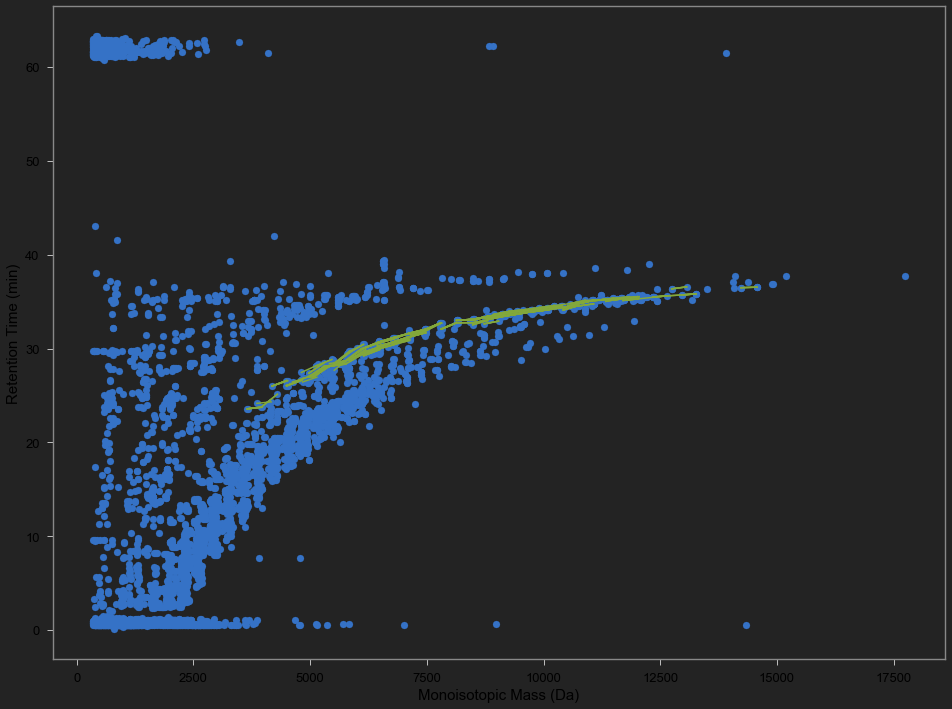

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
plt.xticks(fontname="Arial", size=13, color='black')
plt.yticks(fontname="Arial", size=13, color='black')
plt.scatter(df.Mass, df.RT)
for pair in pairs:
    plt.plot(pair.Mass, pair.RT, color='g')
plt.savefig('/Users/bryan/Downloads/3mix.png', transparent=True)
# plt.savefig('/Users/bryan/Downloads/total_line_only.png', transparent=True)

In [19]:
df_all = pd.concat(pairs)
df_all.shape
df_all.drop_duplicates(inplace=True)
df_all.shape

(1472, 3)

mass_x (342,) mass_y (342,)
df3_idxs 112 df5_idxs 112
df3_idxs 61 df5_idxs 61
df3_idxs 73 df5_idxs 73
df3_idxs 75 df5_idxs 75
df3_idxs 23 df5_idxs 23
df3_idxs 9 df5_idxs 9
df3_idxs 18 df5_idxs 18
df3_idxs 35 df5_idxs 35


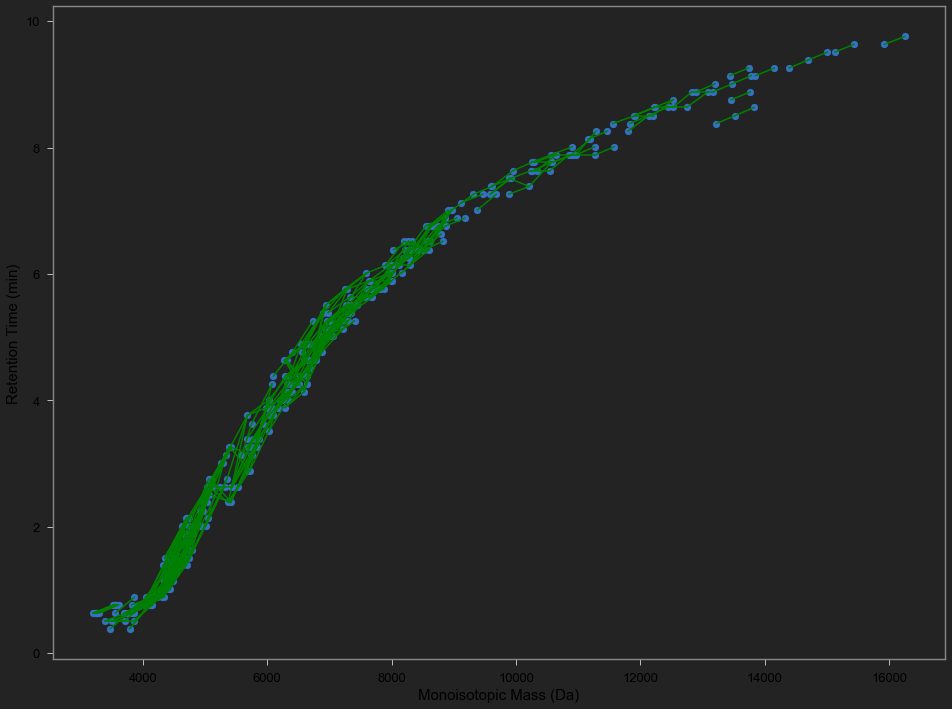

In [36]:
bcr = base_calling_random(df_all)
plt, _ = plot_basecalling(*bcr, annotate=False)

In [38]:
bcr[0].to_excel('/Users/bryan/Downloads/total_sliding_win.xlsx')

win 2700-3300
-1.182481654227684e-15
accept 0 reject 0
win 2800-3400
-0.6415851017478941
accept 0 reject 0
win 2900-3500
-0.9319426711950096
accept 0 reject 0
win 3000-3600
0.25746383055712657
accept 11 reject 0
win 3100-3700
0.24754297194661679


/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



accept 13 reject 0
win 3200-3800
-0.010538497162464123
accept 13 reject 1
win 3300-3900
-0.0024141925345705887
accept 5 reject 4
win 3400-4000
0.005508191171428628
accept 5 reject 2
win 3500-4100
0.12599745041249166
accept 9 reject 2
win 3600-4200
0.4159766620531424
accept 13 reject 2
win 3700-4300
0.6307254683976534
accept 14 reject 2
win 3800-4400
0.9467438949880492
accept 12 reject 8
win 3900-4500
1.2279701244245536
accept 16 reject 11
win 4000-4600
1.287330224796319
accept 14 reject 12
win 4100-4700
1.7475170515682876
accept 12 reject 15
win 4200-4800
1.771077902017845
accept 16 reject 23
win 4300-4900
1.739746802298019
accept 22 reject 20
win 4400-5000
1.7914282344137702
accept 15 reject 14
win 4500-5100
2.025608738012686
accept 12 reject 10
win 4600-5200
1.9840082800502123
accept 11 reject 9
win 4700-5300
2.094973601426185
accept 11 reject 8
win 4800-5400
1.8405080363449966
accept 10 reject 4
win 4900-5500
1.3659550136212966
accept 11 reject 6
win 5000-5600
0.9601683825304044
acc

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



accept 1 reject 0
win 11600-12200
0.5662187174727004
accept 2 reject 0
win 11700-12300
0.5497910367872685
accept 5 reject 1
win 11800-12400
0.5497910367872685
accept 5 reject 1
win 11900-12500
0.28849060663518444
accept 2 reject 0
win 12000-12600
0.3940545328277659
accept 3 reject 1
win 12100-12700
0.3940545328277659
accept 3 reject 1
win 12200-12800
0.1662091521505135
accept 2 reject 2
win 12300-12900
0.47607948117109
accept 1 reject 1
win 12400-13000
0.47607948117109
accept 1 reject 1
win 12500-13100
0.40117393530702844
accept 2 reject 0
win 12600-13200
0.38452378038621926
accept 1 reject 1
win 12700-13300
-0.033183846747706185
accept 2 reject 1
win 12800-13400
-0.42267768872222866
accept 1 reject 1
win 12900-13500
0.42086268234722146
accept 1 reject 0
win 13000-13600
-0.03983750203060972
accept 2 reject 0
win 13100-13700
0.061120117929840075
accept 2 reject 0
win 13200-13800
0.6247422526940078
accept 4 reject 0
win 13300-13900
0.2827439330580661
accept 4 reject 0
win 13400-14000
0.2

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



accept 1 reject 0
win 14500-15100
0.402874082838512
accept 1 reject 0
win 14600-15200
0.31067244927311577
accept 1 reject 0
win 14700-15300
0.31067244927311577
accept 1 reject 0
win 14800-15400
-2.6637400320390623e-14
accept 0 reject 0
win 14900-15500
0.31115238060019146
accept 1 reject 0
win 15000-15600
0.31115238060019146
accept 1 reject 0
win 15100-15700
0.4034829119054818
accept 1 reject 0
win 15400-16000
1.3244323906812227e-15


/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



accept 0 reject 0


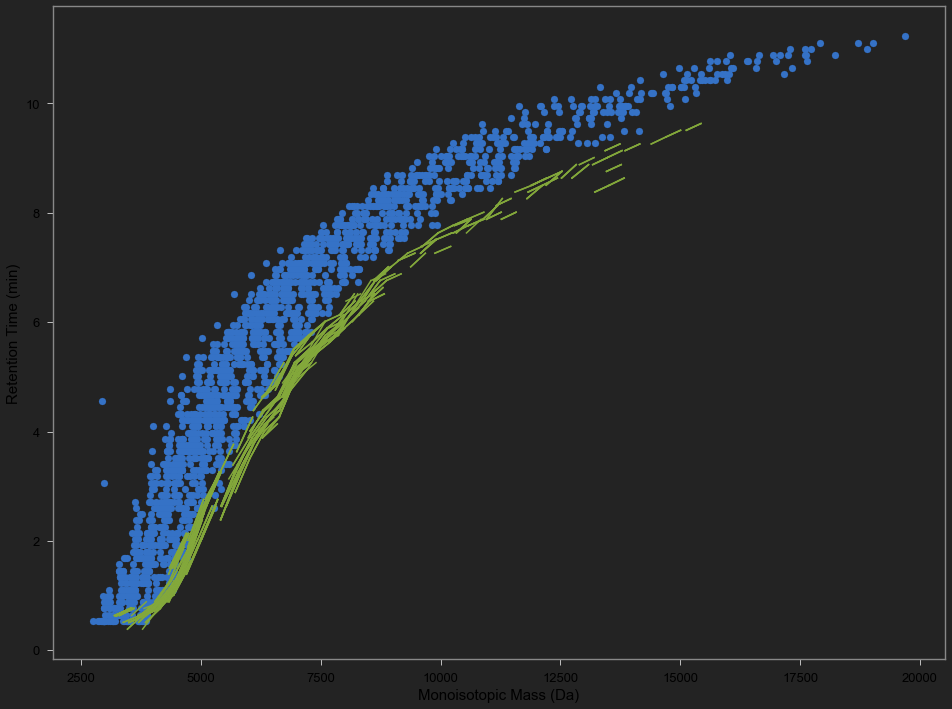

In [37]:
win_pos = 200
win_size = 600
TOP = 2
pairs = list()
while win_pos + win_size < df_all.Mass.max():
    df_win = df_all[(df_all.Mass > win_pos) & (df_all.Mass < win_pos + win_size)]
#     print(df_win.shape)
    if df_win.shape[0] > 1:
#         continue
        print('win {}-{}'.format(win_pos, win_pos+win_size))
        slope, _ = np.polyfit(df_win.Mass, df_win.RT, 1)
        slope = slope * 1E3
        print(slope)
        bcr_5p = base_calling_random(df_win, silence=True)
        accepted_pairs = process_slopes(*bcr_5p, radius=0.40, median=-1)
        if accepted_pairs:
            pairs.extend(accepted_pairs)
    win_pos += 100

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
plt.xticks(fontname="Arial", size=13, color='black')
plt.yticks(fontname="Arial", size=13, color='black')
plt.scatter(df.Mass, df.RT)
for pair in pairs:
    plt.plot(pair.Mass, pair.RT, color='g')
# plt.savefig('/Users/bryan/Downloads/total.png', transparent=True)
# plt.savefig('/Users/bryan/Downloads/total_line_only.png', transparent=True)

In [39]:

idxs = list()
# create our callback function
def update_point(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)
f = zone_selection(df_all, update_point)
f

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': 'a26bc17…

points [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 120, 128, 133, 134, 135, 136, 139, 142, 143, 146, 153, 154, 158, 159, 162, 163, 172, 175, 176, 177, 178, 179, 181, 182, 183, 185, 186, 189, 190, 191, 192, 193, 194, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 224, 225, 226, 230, 232, 233, 235, 236, 237, 238, 239, 240, 242, 243, 244, 245, 246, 247, 248, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 28

In [40]:
df_all_chosen = df_all.iloc[idxs]
df_all_chosen.shape

(274, 3)

mass_x (274,) mass_y (274,)
df3_idxs 89 df5_idxs 89
df3_idxs 47 df5_idxs 47
df3_idxs 47 df5_idxs 47
df3_idxs 54 df5_idxs 54
df3_idxs 15 df5_idxs 15
df3_idxs 3 df5_idxs 3
df3_idxs 10 df5_idxs 10
df3_idxs 20 df5_idxs 20


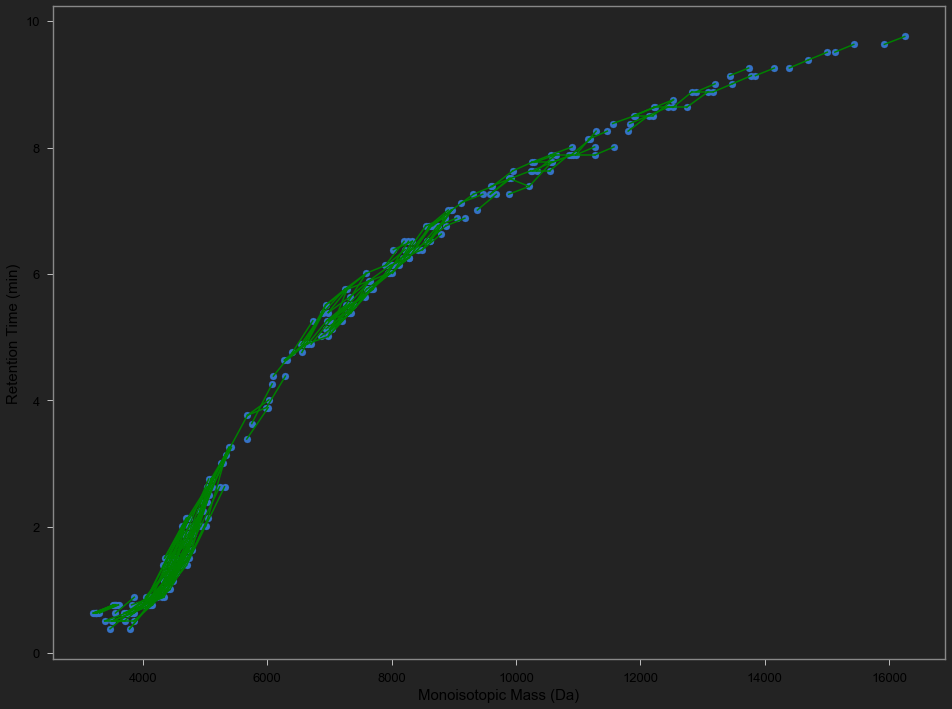

In [41]:
bcr = base_calling_random(df_all_chosen)
plt, _ = plot_basecalling(*bcr, annotate=False)

# Utils Functions

In [55]:
def plot_basecalling3(df, mass_pairs, endpoints=pd.DataFrame(), annotate=True, plt=None, median=-1):
    if not plt:
        plt = matplotlib.pyplot
    fig = plt.figure(figsize=(16, 12))
    plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
    plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
    plt.xticks(fontname="Arial", size=13, color='black')
    plt.yticks(fontname="Arial", size=13, color='black')
        
    plt.scatter(df.Mass, df.RT)

    # calc slopes
    slopes = list()
    for t in mass_pairs:
        df_pair = df[df.Mass.isin(t)]
        if df_pair.empty:
            continue
        
        slope = 1E3 * (df_pair.iloc[0].RT - df_pair.iloc[1].RT)/(df_pair.iloc[0].Mass - df_pair.iloc[1].Mass)
        if slope > 0.:
            slopes.append(slope)
    if median < 0:
        median = np.median(slopes)
    radius = 0.4
    lo = median - radius
    lo = lo if lo > 0 else 0
    hi = median + radius
#     median = slope_range(slopes, 0.5)
#     if not median:
#         return plt, fig
#     lo = median.lo
#     hi = median.hi
        
    count = 0
    count_ignore = 0
    for t in mass_pairs:
        df_pair = df[df.Mass.isin(t)]
        if df_pair.empty:
            continue
        
        slope = 1E3 * (df_pair.iloc[0].RT - df_pair.iloc[1].RT)/(df_pair.iloc[0].Mass - df_pair.iloc[1].Mass)
#         if slope > 0.:
        if lo < slope < hi:
#             slopes.append(slope)
            plt.plot(df_pair.Mass, df_pair.RT, 'green')
            count += 1
        else:
            count_ignore += 1
        
        if not annotate:
            continue
            
        idmax = df_pair['Mass'].idxmax()
        plt.annotate(s=t[2], size=15, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
                     textcoords="offset points", xytext=(-10, 10), ha='center', color='black')
        
        mass = '{:.2f}'.format(df_pair.loc[idmax].Mass)
        plt.annotate(s=mass, size=13, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
                     textcoords="offset points", xytext=(10, -20), ha='center')

    print('median {:.2f} lo-hi {:.3f}-{:.3f} accept {} reject {}'.format((lo+hi)/2, lo, hi, count, count_ignore))
    print(slopes)
    if not endpoints.empty:
        plt.scatter(endpoints.Mass, endpoints.RT, color='r')
        print(endpoints[['Mass', 'RT', 'Vol']])
    return plt, fig

# Single Window

In [56]:
win_pos = 2100
win_size = 600

In [57]:
df_win = df_chosen[(df_chosen.Mass > win_pos) & (df_chosen.Mass < win_pos + win_size)]
df_win.shape

(29, 27)

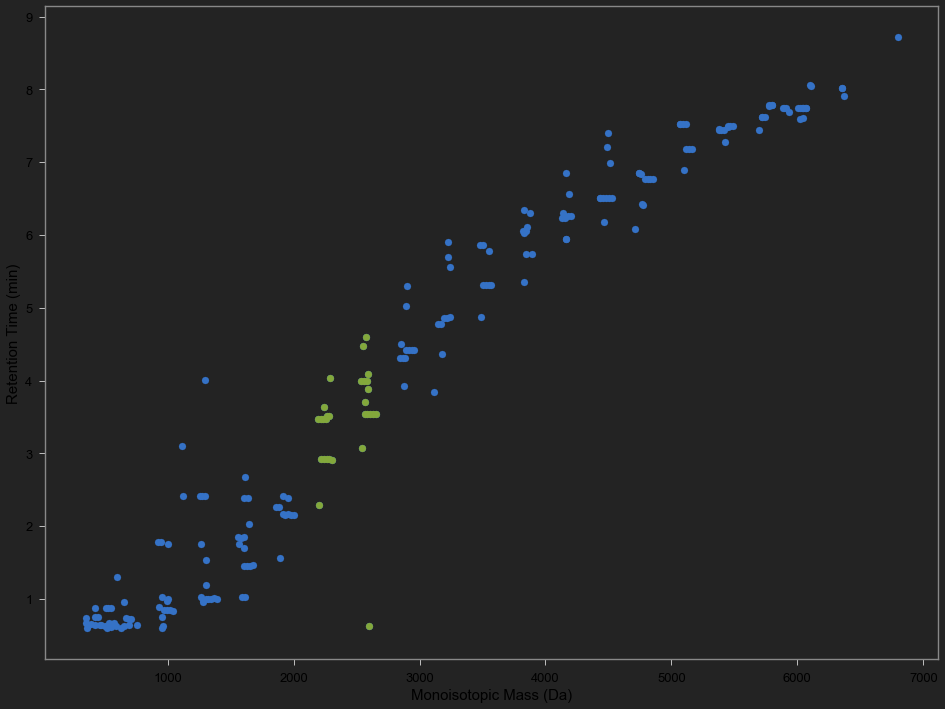

In [58]:
plt = plot_zones(df_chosen, df_win)

0.9861277820488762


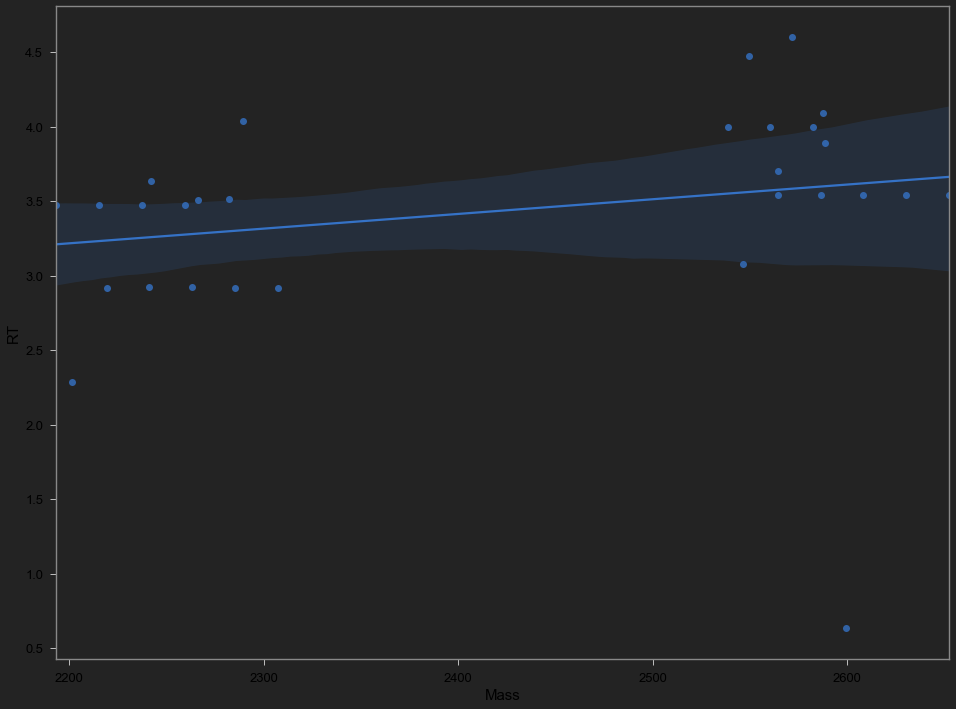

In [59]:
plt = plot_zone(df_win, trend=True)
slope, _ = np.polyfit(df_win.Mass, df_win.RT, 1)
slope = slope * 1E3
print(slope)

In [60]:
def calc_slope(df, mass_pairs):
    masses = list(set(sum(mass_pairs, ())))
    df_basecalls = df[df.Mass.isin(masses)]
    slope, _ = np.polyfit(df_basecalls.Mass, df_basecalls.RT, 1)
    slope = slope * 1E3
    print(slope)
    return df_basecalls, slope

1.8495625521868972
median 1.85 lo-hi 1.450-2.250 accept 9 reject 8
[0.5244964424389742, 1.898104878326229, 3.58318714825838, 2.9266504804356583, 1.7910613864554032, 1.521537581833364, 1.7910665772485845, 2.3069320991053397, 1.7910779970994954, 1.3099600143400034, 1.5186596611244274, 2.26636448473537, 1.7939720221513553, 1.5215411095773348, 1.8229427048238442, 1.241746876434748, 5.047885114679505]


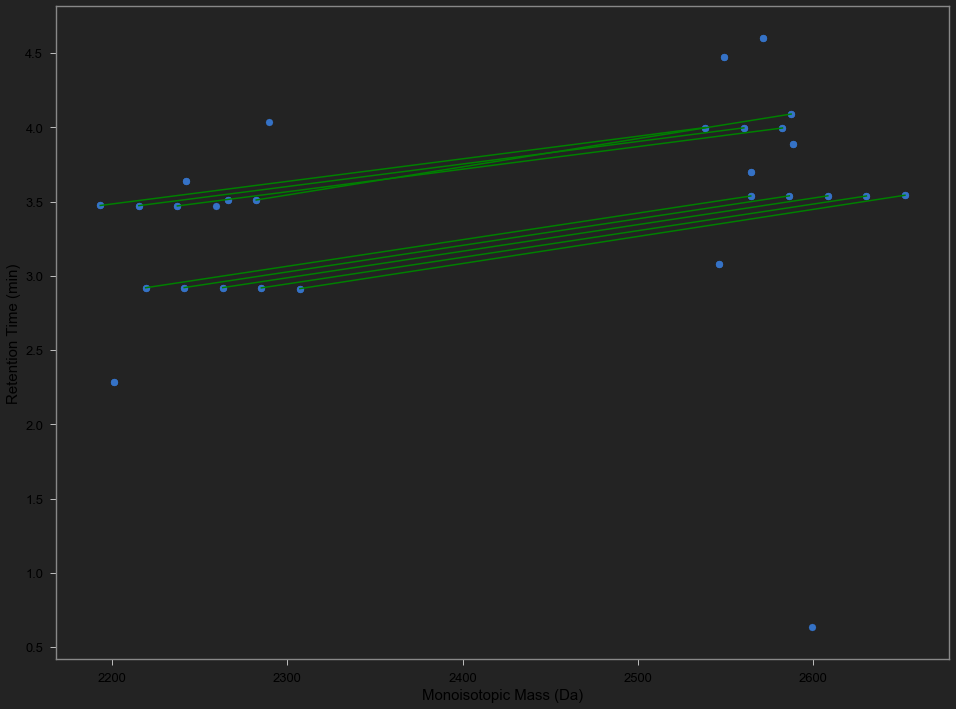

In [66]:
bcr_5p = base_calling_random(df_win, silence=True)
df_bc, slope = calc_slope(*bcr_5p)
# plt, _ = plot_basecalling(*bcr_5p, annotate=False)
plt, _ = plot_basecalling3(*bcr_5p, annotate=False, median=slope)
plt.scatter(df_win.Mass, df_win.RT, color='C0')
plt.savefig('/Users/bryan/Downloads/win.png', transparent=True)

1.8012486979037359


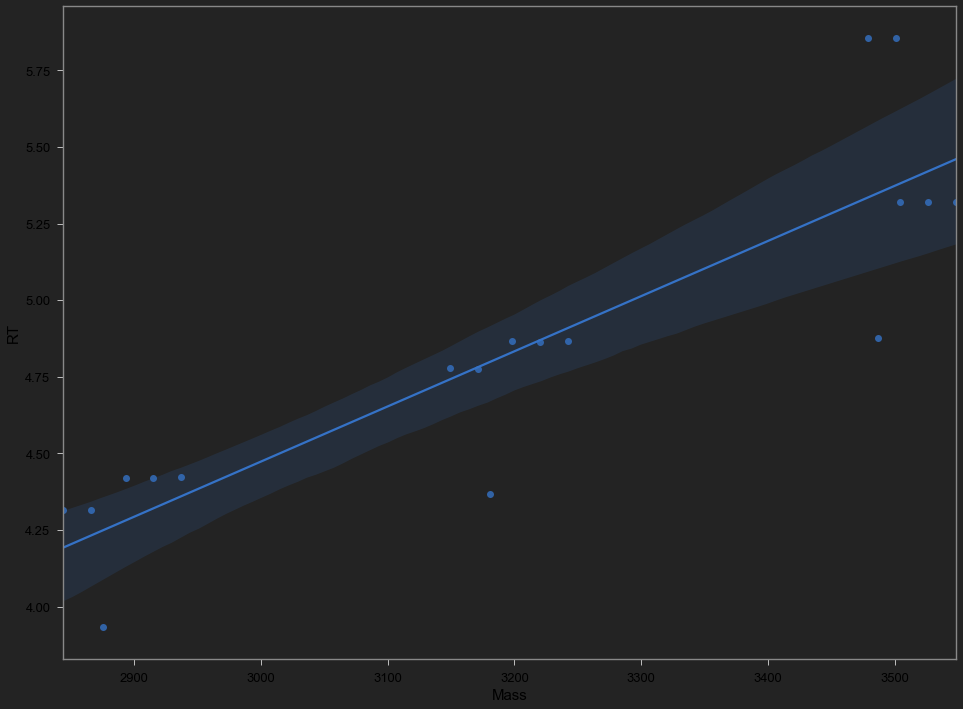

In [119]:
plot_zone(df_bc, trend=True)
slope, _ = np.polyfit(df_bc.Mass, df_bc.RT, 1)
print(slope * 1E3)

In [105]:
# fig = px.scatter(x=df_win.Mass, y=df_win.RT)
# fig.show()